<a href="https://colab.research.google.com/github/andrejdaskalov/rec-sys-evaluation-paper/blob/main/RecPaperVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ROOT_DIR = "/gdrive/MyDrive/movielens_small/ml-latest-small/"
RESULT_PATH = ROOT_DIR+'results/'
def get_result_path(dirname: str) -> str:
    return RESULT_PATH + dirname + '/'

this function is used to standardize visualization names

In [ ]:
# import datetime
VIS_PATH = ROOT_DIR+"visualizations/"
def get_visualizations_path(comp_name) -> str:
    return VIS_PATH + comp_name

## Visualizations input

In [ ]:
FIGURE_NAME = 'LowDataComparison'
comparison = [
    {'name': 'Prompted LLM recommender_full_BAAI_bge-m3_2025-05-18T17:28:41.145772', 'label': 'Content-Based'},
    {'name': 'Popularity_reduced_2025-05-15T12:17:49.521042', 'label': 'Popularity'},
    {'name': 'Collaborative Filtering_reduced_2025-05-15T13:02:33.118723', 'label': 'Collaborative Filtering'},
    {'name': 'Hybrid_reduced_2025-05-15T13:35:09.986108', 'label': 'Hybrid'},
    {'name': 'LowDataHybrid_reduced_2025-05-19T22:17:02.086131', 'label': 'Low-Data Hybrid'},
]

In [ ]:
import pandas as pd

In [ ]:
dfs = [pd.read_csv(get_result_path(result['name'])+'global_metrics.csv', index_col=0) for result in comparison]
merged_df = pd.concat(dfs).set_index('modelName')
merged_df.head()

,recall@5,recall@10,precision@5,precision@10,mrr
modelName,,,,,
Prompted LLM recommender,0.142628,0.223922,0.037705,0.029672,0.113450
Popularity,0.484991,0.586914,0.460656,0.417377,0.631990
Collaborative Filtering,0.280670,0.363453,0.406557,0.344918,0.590379
Hybrid,0.295457,0.396420,0.244590,0.188852,0.450345
LowDataHybrid,0.451104,0.556067,0.466230,0.425738,0.634260


In [ ]:
merged_df['label'] = [result['label'] for result in comparison]
merged_df.set_index('label', inplace=True)
merged_df.head()

,recall@5,recall@10,precision@5,precision@10,mrr
label,,,,,
Content-Based,0.142628,0.223922,0.037705,0.029672,0.113450
Popularity,0.484991,0.586914,0.460656,0.417377,0.631990
Collaborative Filtering,0.280670,0.363453,0.406557,0.344918,0.590379
Hybrid,0.295457,0.396420,0.244590,0.188852,0.450345
Low-Data Hybrid,0.451104,0.556067,0.466230,0.425738,0.634260


## Visualization

In [ ]:
from matplotlib import pyplot as plt

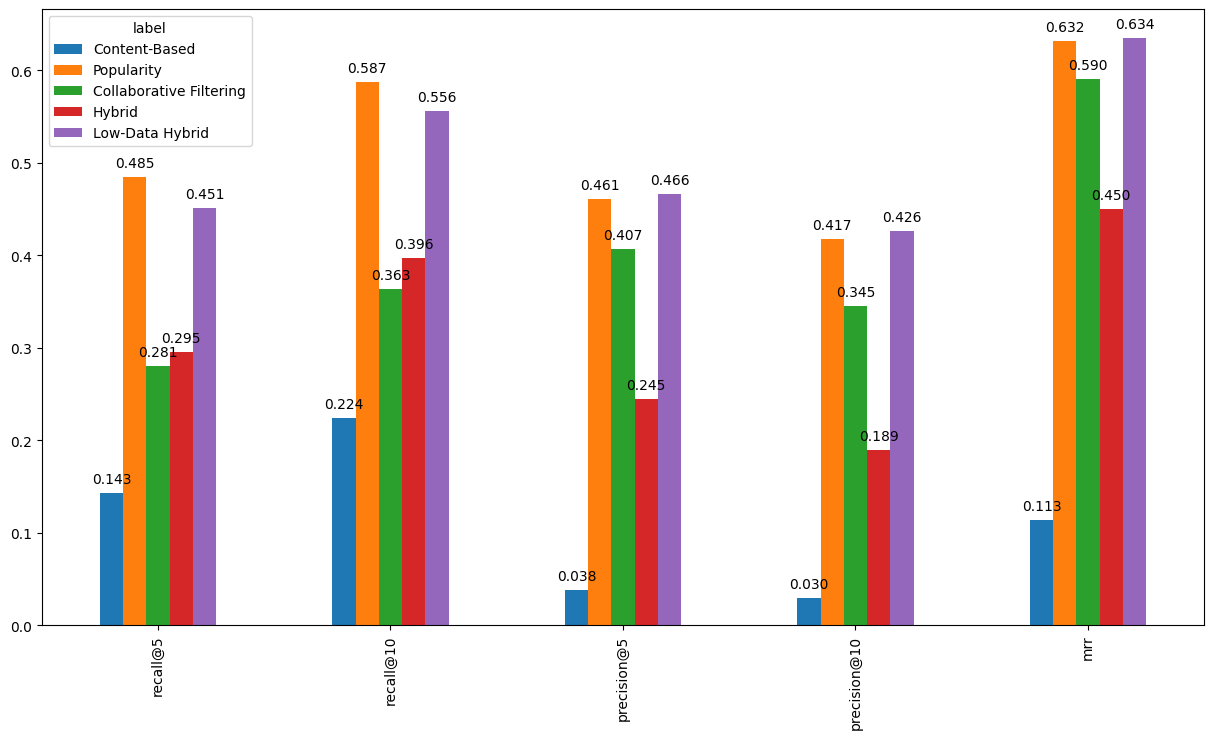

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))  # Create explicit figure and axis
merged_df.transpose().plot(kind='bar', ax=ax)  # Plot directly on the axis
# ax = merged_df.transpose().plot(kind='bar', figsize=(15,8))
for p in ax.patches:
    ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

 save to file

In [ ]:
ax.figure.tight_layout()  # Optional: adjust layout to prevent clipping
ax.figure.savefig(get_visualizations_path(FIGURE_NAME) + '.png', dpi=300, format='png')  # Save the plot as a high-resolution PNG file

# delete runtime

In [ ]:
# from google.colab import runtime
# runtime.unassign()